<a href="https://colab.research.google.com/github/Runshi-Yang/JSC270_HW3_2022_Runshi/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part1: Approximating pi

##A. Implement your method in your notebook to obtain an estimate of $\pi$.

In [14]:
import numpy as np

def point_sampler():
  x = np.random.uniform(0, 1)
  y = np.random.uniform(0, 1)
  point = (x, y)
  return point

np.random.seed(2022)

my_result = [point_sampler() for n in range(1,10000)]

num = 0
for result in my_result:
  if (result[0]-0.5) * (result[0]-0.5) + (result[1]-0.5) * (result[1]-0.5) <= 0.25:
    num += 1

4*num/len(my_result)

3.1075107510751074

The remaining questions are answered in the pdf file.

##B. Please find the answer in the pdf file.

##C. Please find the answer in the pdf file.

##Bonus: Please find the answer in the pdf file.

#Part2: Understanding bias


##A. Run a simulation to compare the bias of the two estimators for $\sigma^2$.

In [15]:
np.random.seed(2022)
mu, sigma = 2, 2
d10 = [np.random.normal(mu, sigma) for i in range(10)]
d25 = [np.random.normal(mu, sigma) for i in range(25)]
d50 = [np.random.normal(mu, sigma) for i in range(50)]
d100 = [np.random.normal(mu, sigma) for i in range(100)]
d250 = [np.random.normal(mu, sigma) for i in range(250)]
d500 = [np.random.normal(mu, sigma) for i in range(500)]


def sample_estimator1 (sample_data):
  mean = np.mean(sample_data)
  sum = 0
  for data in sample_data:
    sum += ((data - mean) ** 2)
  return sum / (len(sample_data) - 1)

def sample_estimator2 (sample_data):
  mean = np.mean(sample_data)
  sum = 0
  for data in sample_data:
    sum += ((data - mean) ** 2)
  return sum / len(sample_data)

def estimator_sampler(sample_data):
  estimates1 = [sample_estimator1(sample_data) - 4 for i in range(1000)]
  estimates2 = [sample_estimator2(sample_data) - 4 for i in range(1000)]
  return np.mean(estimates1), np.mean(estimates2)

estimators = [estimator_sampler(d10),
estimator_sampler(d25),
estimator_sampler(d50),
estimator_sampler(d100),
estimator_sampler(d250),
estimator_sampler(d500)]
estimators

[(-2.405104348277895, -2.5645939134501052),
 (0.8397320459605446, 0.6461427641221221),
 (0.02085481160013014, -0.05956228463187241),
 (-0.15396951307051632, -0.19242981793981118),
 (-0.12324881842124435, -0.13875582314755963),
 (0.0070536513989312155, -0.0009604559038667304)]

B.Make a plot of bias vs sample size for the two estimators.

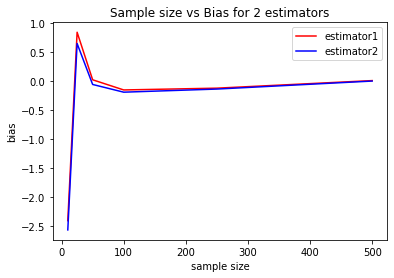

In [16]:
bias1 = [estimator[0] for estimator in estimators]
bias2 = [estimator[1] for estimator in estimators]

import matplotlib.pyplot as plt
x = [10, 25, 50, 100, 250, 500]
l1 = plt.plot(x, bias1, 'r', label='estimator1')
l2 = plt.plot(x, bias2, 'b', label='estimator2')
plt.title('Sample size vs Bias for 2 estimators')
plt.xlabel('sample size')
plt.ylabel('bias')
plt.legend(loc='upper right')
plt.show()

What do you observe? Is this behavior expected?

Please find the answer in the pdf file.

#Part3: Simulation IRL

All the questions are answered in the pdf file.

#Part4: Asymptotic behavior 

##A. Empirical mean for exponential distribution.

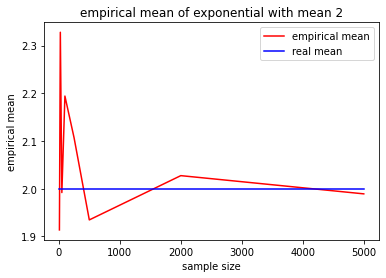

In [9]:
np.random.seed(2022)
mean = 2
d10 = [np.random.exponential(mean ,1) for i in range(10)]
d25 = [np.random.exponential(mean ,1) for i in range(25)]
d50 = [np.random.exponential(mean ,1) for i in range(50)]
d100 = [np.random.exponential(mean ,1) for i in range(100)]
d250 = [np.random.exponential(mean ,1) for i in range(250)]
d500 = [np.random.exponential(mean ,1) for i in range(500)]
d2000 = [np.random.exponential(mean ,1) for i in range(2000)]
d5000 = [np.random.exponential(mean ,1) for i in range(5000)]

datas = [d10, d25, d50, d100, d250, d500, d2000, d5000]
sample_size = [10, 25, 50, 100, 250, 500, 2000, 5000]
empirical_means = [np.mean(data) for data in datas]
means = [2 for data in datas]
l1 = plt.plot(sample_size, empirical_means, 'r', label='empirical mean')
l2 = plt.plot(sample_size, means, 'b', label='real mean')
plt.title('empirical mean of exponential with mean 2')
plt.xlabel('sample size')
plt.ylabel('empirical mean')
plt.legend(loc='upper right')
plt.show()

The remaining questions are answered in the pdf file.

##B. Empirical mean for Cauchy distribution

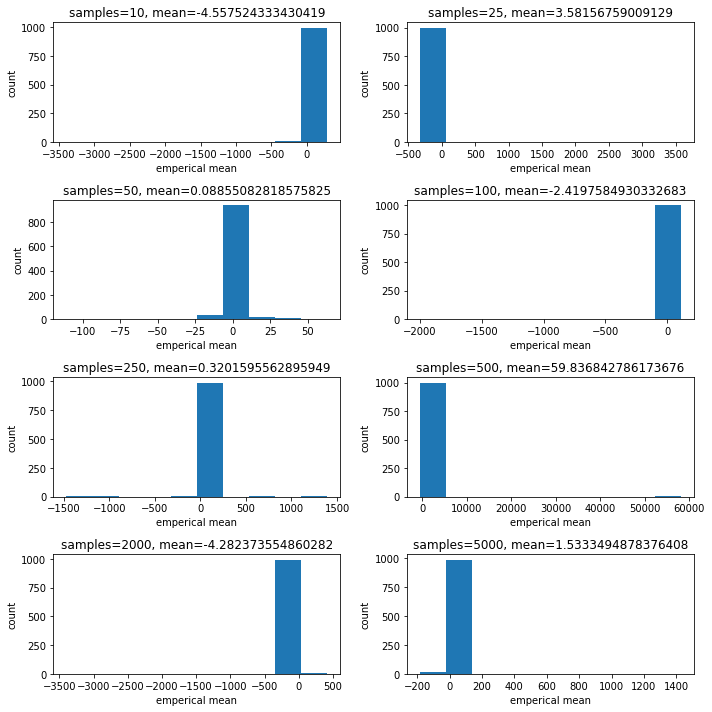

In [13]:
np.random.seed(2022)
sample_size = [10, 25, 50, 100, 250, 500, 2000, 5000]
data = []
for size in sample_size:
  data.append([np.mean(np.random.standard_cauchy(size)) for i in range(1000)])

fig, axs = plt.subplots(4, 2, figsize=(10,10))
axs[0, 0].hist(data[0])
axs[0, 0].set_title('samples=10, mean='+str(np.mean(data[0])))
axs[0, 1].hist(data[1])
axs[0, 1].set_title('samples=25, mean='+str(np.mean(data[1])))
axs[1, 0].hist(data[2])
axs[1, 0].set_title('samples=50, mean='+str(np.mean(data[2])))
axs[1, 1].hist(data[3])
axs[1, 1].set_title('samples=100, mean='+str(np.mean(data[3])))
axs[2, 0].hist(data[4])
axs[2, 0].set_title('samples=250, mean='+str(np.mean(data[4])))
axs[2, 1].hist(data[5])
axs[2, 1].set_title('samples=500, mean='+str(np.mean(data[5])))
axs[3, 0].hist(data[6])
axs[3, 0].set_title('samples=2000, mean='+str(np.mean(data[6])))
axs[3, 1].hist(data[7])
axs[3, 1].set_title('samples=5000, mean='+str(np.mean(data[7])))

for ax in axs.flat:
    ax.set(xlabel='emperical mean', ylabel='count')

fig.tight_layout()

plt.show()

The remaining questions are answered in the pdf file.

#Part5: Logistic Regression

All the questions are answered in the pdf file.